K-Means Clustering

Best Silhouette Score: 0.25102402710445704
Number of Clusters: 9
              TEMP        DO        pH  CONDUCTIVITY        BOD  \
Cluster                                                           
0        28.203175  6.028571  7.033333    386.196721   3.815873   
1        28.753125  5.182188  8.253125    866.586207  10.318750   
2        27.491241  6.670652  8.046377    840.632353   3.323881   
3        28.141176  6.100000  7.817647   1312.875000  10.243750   
4        17.800000  6.619355  7.780645    507.900000   8.470968   
5        25.395652  3.391304  7.352174    669.050000  14.213043   
6        23.147482  7.704286  7.725714    337.978102   2.874820   
7        22.721429  4.286667  7.543750    968.428571  19.325000   
8        23.830137  5.533784  8.122973   1095.873239   4.610811   

         NITRATE_N_NITRITE_N  FECAL_COLIFORM  TOTAL_COLIFORM  
Cluster                                                       
0                   1.404921     5621.982759    1.674545e+04  
1       

<ipython-input-2-6cdade53fa10>:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')
<ipython-input-2-6cdade53fa10>:89: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['pH'], cluster_data['DO'], c=colors[cluster_num], label=f'Cluster {cluster_num}')


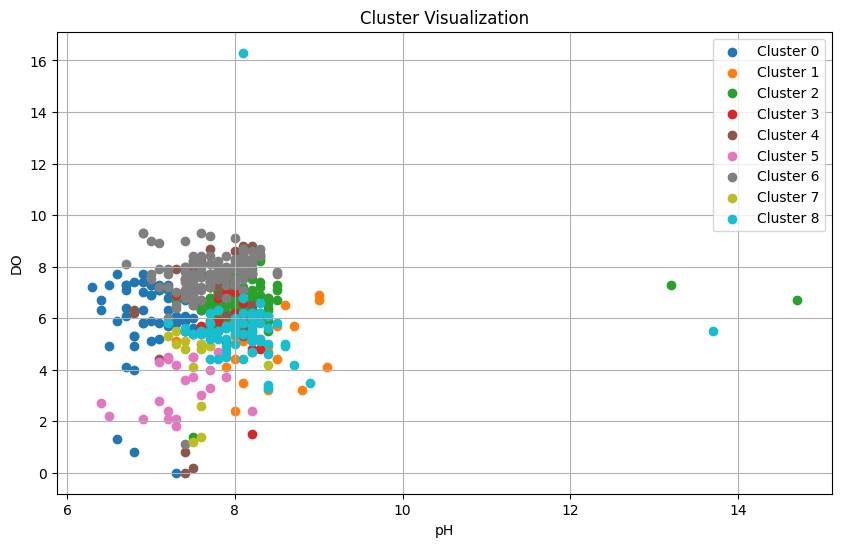

<Figure size 1200x800 with 0 Axes>

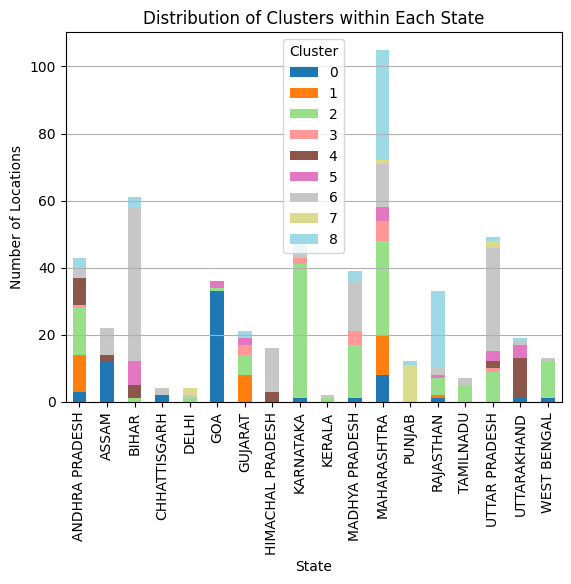

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import numpy as np
from matplotlib.cm import get_cmap

# Load the data with specified encoding
data = pd.read_csv("/content/waterquality.csv", encoding='latin1')

# Select relevant features for clustering (exclude non-numeric columns and station code)
X = data[['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM']]

# Data preprocessing: Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Data preprocessing: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Remove outliers using Z-score
z_scores = np.abs((X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0))
outlier_indices = np.where(z_scores > 3)
X_cleaned = X_scaled.copy()
X_cleaned[outlier_indices] = np.nan
X_imputed_cleaned = imputer.fit_transform(X_cleaned)

# Choose the range of number of clusters to try
min_clusters = 2
max_clusters = 10
best_silhouette_score = -1
best_kmeans_model = None
best_num_clusters = -1

# Iterate over different numbers of clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_imputed_cleaned)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_imputed_cleaned, kmeans.labels_)

    # Update the best silhouette score and model if necessary
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_kmeans_model = kmeans
        best_num_clusters = n_clusters

# Add cluster labels to the original dataset
data['Cluster'] = best_kmeans_model.labels_

# Print the best silhouette score and number of clusters
print("Best Silhouette Score:", best_silhouette_score)
print("Number of Clusters:", best_num_clusters)

# Group by state and analyze cluster characteristics
try:
    state_cluster_means = data.drop(columns=['STATE', 'STATION CODE','LOCATIONS']).groupby('Cluster').mean()
    print(state_cluster_means)
except Exception as e:
    print(e)

# Group by cluster and concatenate states belonging to each cluster
cluster_states = data.groupby('Cluster')['STATE'].unique()

# Print cluster means and states
for cluster_num in range(best_num_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    mean_pH = cluster_data['pH'].mean()
    mean_DO = cluster_data['DO'].mean()
    print(f'Cluster {cluster_num} - Mean pH: {mean_pH:.2f}, Mean DO: {mean_DO:.2f}')
    print(f'States in Cluster {cluster_num}: {", ".join(cluster_states[cluster_num])}')
    print()

# Create a scatter plot to visualize clusters
plt.figure(figsize=(10, 6))

# Generate colors for each cluster using a colormap
cmap = get_cmap('tab10')
colors = cmap(np.linspace(0, 1, best_num_clusters))

# Iterate over each cluster and plot stations belonging to that cluster
for cluster_num in range(best_num_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    plt.scatter(cluster_data['pH'], cluster_data['DO'], c=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.xlabel('pH')
plt.ylabel('DO')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)
plt.show()

# Convert 'STATE' column to string to avoid errors in grouping
data['STATE'] = data['STATE'].astype(str)

# Group by state and cluster, and count the number of locations in each cluster within each state
state_cluster_counts = data.groupby(['STATE', 'Cluster']).size().unstack(fill_value=0)

# Plot the distribution of clusters within each state
plt.figure(figsize=(12, 8))
state_cluster_counts.plot(kind='bar', stacked=True, cmap='tab20')
plt.xlabel('State')
plt.ylabel('Number of Locations')
plt.title('Distribution of Clusters within Each State')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.show()

Hierarchial Clustering

Best Silhouette Score: 0.23791593954738635
Number of Clusters: 10
              TEMP        DO        pH  CONDUCTIVITY        BOD  \
Cluster                                                           
0        23.279605  7.623377  7.709740    335.959732   3.345098   
1        28.608333  5.951667  7.085000    838.457627   3.781667   
2        20.306061  5.196970  8.054545    475.593750   8.069697   
3        30.017647  5.710588  8.323529    761.062500  14.817647   
4        27.586923  6.696154  8.076154    718.589147   2.844444   
5        22.181818  4.200000  7.518182   1003.545455  22.945455   
6        25.317647  3.264706  7.223529    398.066667  14.500000   
7        25.474286  5.118310  8.032394   1281.171875   6.240845   
8        26.476190  5.422727  7.695652   1207.150000  10.727273   
9        17.633333  8.277778  7.877778    273.222222   1.450000   

         NITRATE_N_NITRITE_N  FECAL_COLIFORM  TOTAL_COLIFORM  
Cluster                                                       
0  

<ipython-input-3-cd4df16cb243>:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')
<ipython-input-3-cd4df16cb243>:61: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['pH'], cluster_data['DO'], c=colors[cluster_num], label=f'Cluster {cluster_num}')


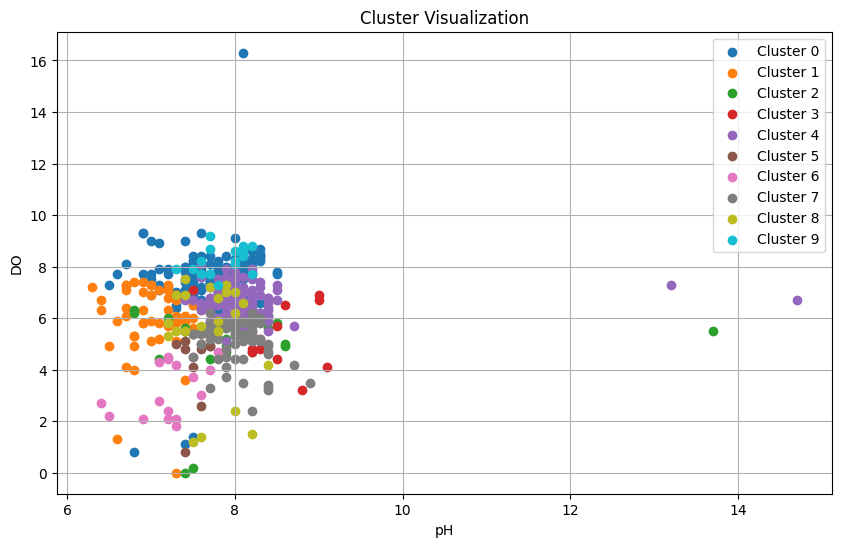

<Figure size 1200x800 with 0 Axes>

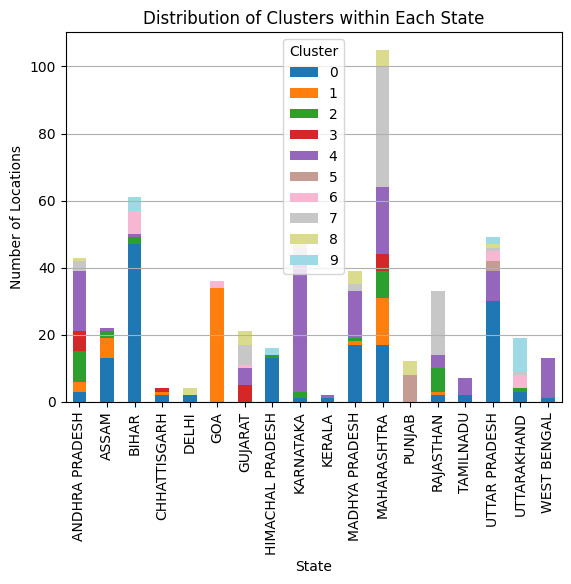

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Choose the range of number of clusters to try
min_clusters = 2
max_clusters = 10
best_silhouette_score = -1
best_agg_model = None
best_num_clusters = -1

# Iterate over different numbers of clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    # Apply Hierarchical (Agglomerative) Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    agg_clustering.fit(X_imputed_cleaned)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_imputed_cleaned, agg_clustering.labels_)

    # Update the best silhouette score and model if necessary
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_agg_model = agg_clustering
        best_num_clusters = n_clusters

# Add cluster labels to the original dataset
data['Cluster'] = best_agg_model.labels_

# Print the best silhouette score and number of clusters
print("Best Silhouette Score:", best_silhouette_score)
print("Number of Clusters:", best_num_clusters)

# Group by state and analyze cluster characteristics
try:
    state_cluster_means = data.drop(columns=['STATE', 'STATION CODE','LOCATIONS']).groupby('Cluster').mean()
    print(state_cluster_means)
except Exception as e:
    print(e)

# Group by cluster and concatenate states belonging to each cluster
cluster_states = data.groupby('Cluster')['STATE'].unique()

# Print cluster means and states
for cluster_num in range(best_num_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    mean_pH = cluster_data['pH'].mean()
    mean_DO = cluster_data['DO'].mean()
    print(f'Cluster {cluster_num} - Mean pH: {mean_pH:.2f}, Mean DO: {mean_DO:.2f}')
    print(f'States in Cluster {cluster_num}: {", ".join(cluster_states[cluster_num])}')
    print()

# Create a scatter plot to visualize clusters
plt.figure(figsize=(10, 6))

# Generate colors for each cluster using a colormap
cmap = get_cmap('tab10')
colors = cmap(np.linspace(0, 1, best_num_clusters))

# Iterate over each cluster and plot stations belonging to that cluster
for cluster_num in range(best_num_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    plt.scatter(cluster_data['pH'], cluster_data['DO'], c=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.xlabel('pH')
plt.ylabel('DO')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)
plt.show()

# Convert 'STATE' column to string to avoid errors in grouping
data['STATE'] = data['STATE'].astype(str)

# Group by state and cluster, and count the number of locations in each cluster within each state
state_cluster_counts = data.groupby(['STATE', 'Cluster']).size().unstack(fill_value=0)

# Plot the distribution of clusters within each state
plt.figure(figsize=(12, 8))
state_cluster_counts.plot(kind='bar', stacked=True, cmap='tab20')
plt.xlabel('State')
plt.ylabel('Number of Locations')
plt.title('Distribution of Clusters within Each State')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.show()


DBSCAN

Number of Clusters: 6
Silhouette Score: -0.14552933866497897
              TEMP        DO        pH  CONDUCTIVITY       BOD  \
Cluster                                                          
-1       24.928137  5.823698  7.718727    831.934959  7.690189   
 0       28.971429  6.614286  8.042857   2422.714286  3.450000   
 1       25.559070  7.008333  7.894444    448.784038  2.593868   
 2       17.255556  8.522222  8.077778    322.666667  1.255556   
 3       27.183333  5.933333  7.350000    275.833333  6.316667   
 4       29.011111  7.222222  6.900000    206.111111  1.266667   
 5       24.330769  5.569231  8.200000    506.538462  9.438462   

         NITRATE_N_NITRITE_N  FECAL_COLIFORM  TOTAL_COLIFORM  
Cluster                                                       
-1                  2.088158     7905.995455   165857.619247  
 0                  1.996429      532.000000      728.714286  
 1                  0.535349     8329.449198   103643.616114  
 2                  0.000000 

<ipython-input-4-79efe2c01173>:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')
<ipython-input-4-79efe2c01173>:54: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['pH'], cluster_data['DO'], c=colors[cluster_num], label=f'Cluster {cluster_num}')


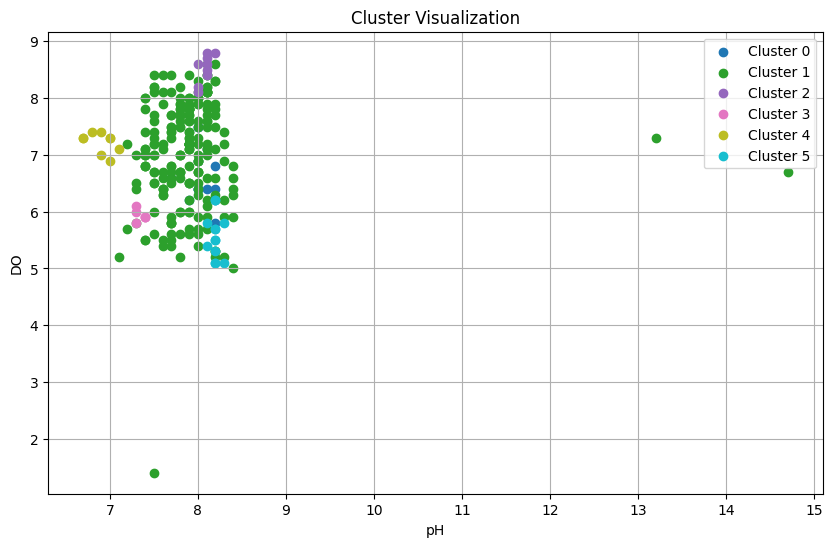

<Figure size 1200x800 with 0 Axes>

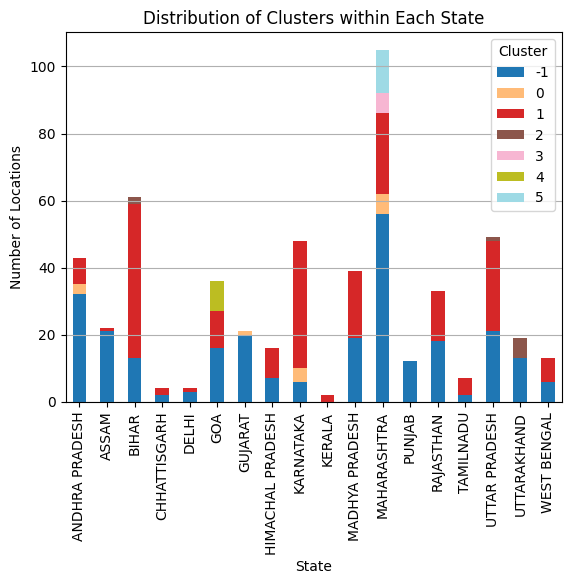

In [ ]:
from sklearn.cluster import DBSCAN

# Choose the DBSCAN parameters
eps = 0.5 # Maximum distance between two samples to be considered as in the same neighborhood
min_samples = 6  # Minimum number of samples in a neighborhood for a data point to be considered as a core point

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X_imputed_cleaned)

# Add cluster labels to the original dataset
data['Cluster'] = dbscan.labels_

# Print the number of clusters (including noise points)
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Number of Clusters:", num_clusters)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_imputed_cleaned, dbscan.labels_)
print("Silhouette Score:", silhouette_avg)

# Convert 'STATE' column to string to avoid errors in grouping
data['STATE'] = data['STATE'].astype(str)

# Group by state and analyze cluster characteristics
try:
    state_cluster_means = data.drop(columns=['STATE', 'STATION CODE','LOCATIONS']).groupby('Cluster').mean()
    print(state_cluster_means)
except Exception as e:
    print(e)

# Group by cluster and concatenate states belonging to each cluster
cluster_states = data.groupby('Cluster')['STATE'].unique()

# Print cluster means and states
for cluster_num in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    mean_pH = cluster_data['pH'].mean()
    mean_DO = cluster_data['DO'].mean()
    print(f'Cluster {cluster_num} - Mean pH: {mean_pH:.2f}, Mean DO: {mean_DO:.2f}')
    print(f'States in Cluster {cluster_num}: {", ".join(cluster_states[cluster_num])}')
    print()

# Create a scatter plot to visualize clusters
plt.figure(figsize=(10, 6))

# Generate colors for each cluster using a colormap
cmap = get_cmap('tab10')
colors = cmap(np.linspace(0, 1, num_clusters))

# Iterate over each cluster and plot stations belonging to that cluster
for cluster_num in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    plt.scatter(cluster_data['pH'], cluster_data['DO'], c=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.xlabel('pH')
plt.ylabel('DO')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)
plt.show()

# Convert 'STATE' column to string to avoid errors in grouping
data['STATE'] = data['STATE'].astype(str)

# Group by state and cluster, and count the number of locations in each cluster within each state
state_cluster_counts = data.groupby(['STATE', 'Cluster']).size().unstack(fill_value=0)

# Plot the distribution of clusters within each state
plt.figure(figsize=(12, 8))
state_cluster_counts.plot(kind='bar', stacked=True, cmap='tab20')
plt.xlabel('State')
plt.ylabel('Number of Locations')
plt.title('Distribution of Clusters within Each State')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.show()

Number of Clusters: 12
Silhouette Score: -0.2735609871143865
              TEMP        DO        pH  CONDUCTIVITY       BOD  \
Cluster                                                          
-1       24.997767  6.304148  7.793366    681.585938  5.945387   
 0       29.237500  6.400000  8.075000   3614.750000  4.162500   
 1       24.427778  5.594444  8.144444    455.166667  7.755556   
 2       25.811111  5.566667  7.911111   1976.666667  1.166667   
 3       26.133333  7.200000  8.511111    339.000000  2.355556   
 4       23.842857  7.700000  7.800000    296.571429  2.428571   
 5       24.480000  8.100000  8.060000    372.800000  2.510000   
 6       23.950000  6.430769  7.407692    361.250000  5.484615   
 7       29.253846  6.769231  8.253846    608.230769  2.046154   
 8       29.981818  5.809091  7.427273    182.727273  1.890909   
 9       17.255556  8.522222  8.077778    322.666667  1.255556   
 10      27.183333  5.933333  7.350000    275.833333  6.316667   
 11      29.278

<ipython-input-5-7ffa5e9acf8e>:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')
<ipython-input-5-7ffa5e9acf8e>:54: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['pH'], cluster_data['DO'], c=colors[cluster_num], label=f'Cluster {cluster_num}')


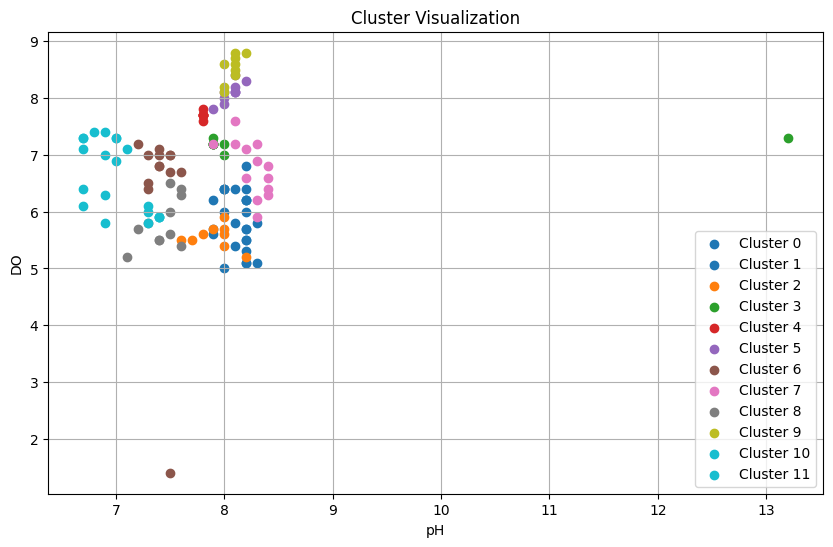

<Figure size 1200x800 with 0 Axes>

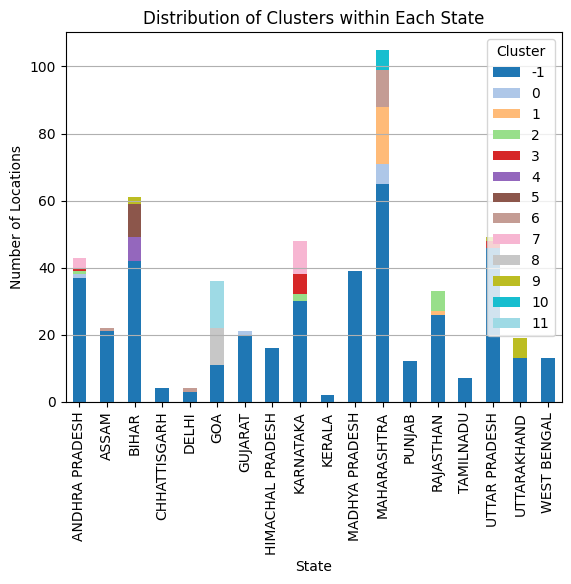

In [ ]:
from sklearn.cluster import OPTICS

# Choose the OPTICS parameters
min_samples = 5  # Minimum number of samples in a neighborhood for a data point to be considered as a core point
max_eps = 0.5 # The maximum distance between two samples for one to be considered as in the neighborhood of the other

# Apply OPTICS clustering
optics = OPTICS(min_samples=min_samples, max_eps=max_eps)
optics.fit(X_imputed_cleaned)

# Add cluster labels to the original dataset
data['Cluster'] = optics.labels_

# Print the number of clusters (including noise points)
num_clusters = len(set(optics.labels_)) - (1 if -1 in optics.labels_ else 0)
print("Number of Clusters:", num_clusters)

# Calculate and print the silhouette score
silhouette_avg = silhouette_score(X_imputed_cleaned, optics.labels_)
print("Silhouette Score:", silhouette_avg)

# Convert 'STATE' column to string to avoid errors in grouping
data['STATE'] = data['STATE'].astype(str)

# Group by state and analyze cluster characteristics
try:
    state_cluster_means = data.drop(columns=['STATE', 'STATION CODE','LOCATIONS']).groupby('Cluster').mean()
    print(state_cluster_means)
except Exception as e:
    print(e)

# Group by cluster and concatenate states belonging to each cluster
cluster_states = data.groupby('Cluster')['STATE'].unique()

# Print cluster means and states
for cluster_num in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    mean_pH = cluster_data['pH'].mean()
    mean_DO = cluster_data['DO'].mean()
    print(f'Cluster {cluster_num} - Mean pH: {mean_pH:.2f}, Mean DO: {mean_DO:.2f}')
    print(f'States in Cluster {cluster_num}: {", ".join(cluster_states[cluster_num])}')
    print()

# Create a scatter plot to visualize clusters
plt.figure(figsize=(10, 6))

# Generate colors for each cluster using a colormap
cmap = get_cmap('tab10')
colors = cmap(np.linspace(0, 1, num_clusters))

# Iterate over each cluster and plot stations belonging to that cluster
for cluster_num in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    plt.scatter(cluster_data['pH'], cluster_data['DO'], c=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.xlabel('pH')
plt.ylabel('DO')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)
plt.show()

# Convert 'STATE' column to string to avoid errors in grouping
data['STATE'] = data['STATE'].astype(str)

# Group by state and cluster, and count the number of locations in each cluster within each state
state_cluster_counts = data.groupby(['STATE', 'Cluster']).size().unstack(fill_value=0)

# Plot the distribution of clusters within each state
plt.figure(figsize=(12, 8))
state_cluster_counts.plot(kind='bar', stacked=True, cmap='tab20')
plt.xlabel('State')
plt.ylabel('Number of Locations')
plt.title('Distribution of Clusters within Each State')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.show()

Mean-Shift

In [ ]:
from sklearn.cluster import MeanShift
# Iterate over a range of bandwidth values (1 to 10) and calculate silhouette score for each
best_bandwidth = None
best_score = -1

for bandwidth in range(1, 11):
    # Apply Mean Shift clustering with current bandwidth
    meanshift = MeanShift(bandwidth=bandwidth, min_bin_freq=10)
    meanshift.fit(X_imputed_cleaned)

    # Calculate silhouette score if there are more than one cluster
    if len(np.unique(meanshift.labels_)) > 1:
        silhouette_avg = silhouette_score(X_imputed_cleaned, meanshift.labels_)

        # Update best score and bandwidth if needed
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_bandwidth = bandwidth

print("Best Bandwidth:", best_bandwidth)
print("Best Silhouette Score:", best_score)


Best Bandwidth: 2
Best Silhouette Score: 0.4290186011066886


Number of Clusters: 2
Silhouette Score: 0.4290186011066886
              TEMP        DO        pH  CONDUCTIVITY        BOD  \
Cluster                                                           
0        25.285605  6.434761  7.803053    678.637097   4.999614   
1        22.362500  3.777778  7.540000   1078.000000  22.960000   

         NITRATE_N_NITRITE_N  FECAL_COLIFORM  TOTAL_COLIFORM  
Cluster                                                       
0                   1.284866     6731.801802    5.189450e+04  
1                   6.270000    43590.625000    3.640767e+06  
Cluster 0 - Mean pH: 7.80, Mean DO: 6.43
States in Cluster 0: MAHARASHTRA, ANDHRA PRADESH, UTTARAKHAND, UTTAR PRADESH, BIHAR, WEST BENGAL, ASSAM, KARNATAKA, HIMACHAL PRADESH, DELHI, KERALA, TAMILNADU, MADHYA PRADESH, RAJASTHAN, PUNJAB, GOA, CHHATTISGARH, GUJARAT

Cluster 1 - Mean pH: 7.54, Mean DO: 3.78
States in Cluster 1: DELHI, UTTAR PRADESH, PUNJAB



<ipython-input-7-7e924dcc9f61>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')
<ipython-input-7-7e924dcc9f61>:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['pH'], cluster_data['DO'], c=colors[cluster_num], label=f'Cluster {cluster_num}')


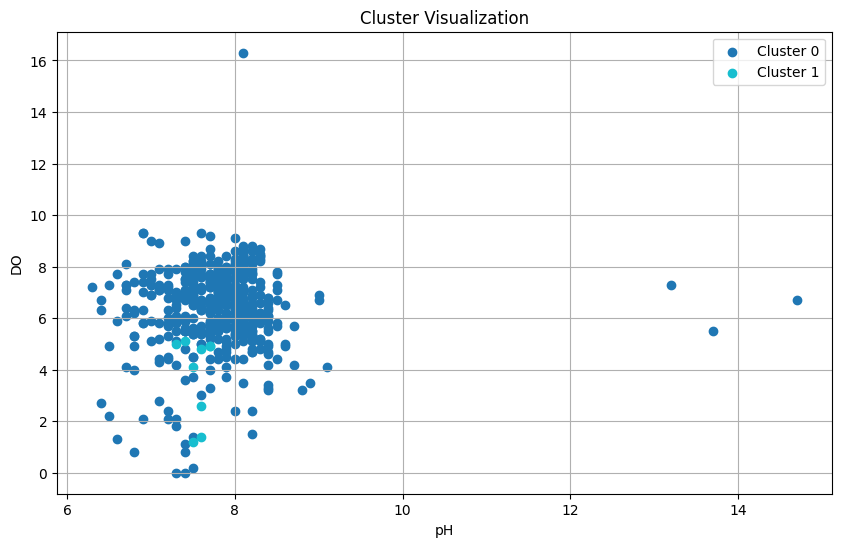

<Figure size 1200x800 with 0 Axes>

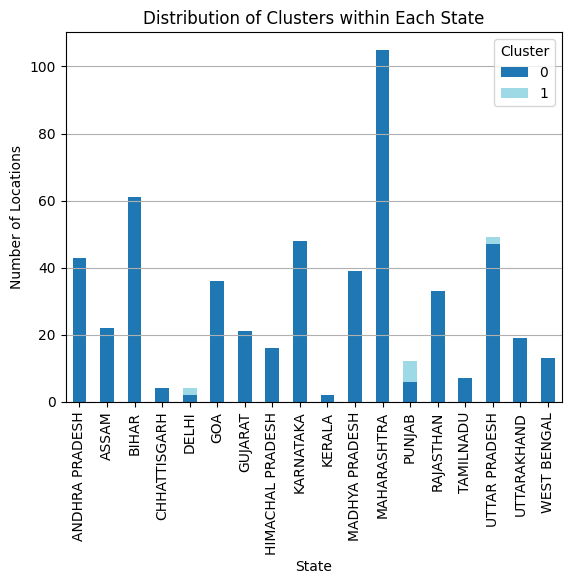

In [ ]:

# Apply Mean Shift clustering
meanshift = MeanShift(bandwidth=best_bandwidth)
meanshift.fit(X_imputed_cleaned)

# Add cluster labels to the original dataset
data['Cluster'] = meanshift.labels_

# Print the number of clusters
num_clusters = len(set(meanshift.labels_))
print("Number of Clusters:", num_clusters)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_imputed_cleaned, meanshift.labels_)
print("Silhouette Score:", silhouette_avg)

# Convert 'STATE' column to string to avoid errors in grouping
data['STATE'] = data['STATE'].astype(str)

# Group by state and analyze cluster characteristics
try:
    state_cluster_means = data.drop(columns=['STATE', 'STATION CODE','LOCATIONS']).groupby('Cluster').mean()
    print(state_cluster_means)
except Exception as e:
    print(e)

# Group by cluster and concatenate states belonging to each cluster
cluster_states = data.groupby('Cluster')['STATE'].unique()

# Print cluster means and states
for cluster_num in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    mean_pH = cluster_data['pH'].mean()
    mean_DO = cluster_data['DO'].mean()
    print(f'Cluster {cluster_num} - Mean pH: {mean_pH:.2f}, Mean DO: {mean_DO:.2f}')
    print(f'States in Cluster {cluster_num}: {", ".join(cluster_states[cluster_num])}')
    print()

# Create a scatter plot to visualize clusters
plt.figure(figsize=(10, 6))

# Generate colors for each cluster using a colormap
cmap = get_cmap('tab10')
colors = cmap(np.linspace(0, 1, num_clusters))

# Iterate over each cluster and plot stations belonging to that cluster
for cluster_num in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    plt.scatter(cluster_data['pH'], cluster_data['DO'], c=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.xlabel('pH')
plt.ylabel('DO')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)
plt.show()

# Convert 'STATE' column to string to avoid errors in grouping
data['STATE'] = data['STATE'].astype(str)

# Group by state and cluster, and count the number of locations in each cluster within each state
state_cluster_counts = data.groupby(['STATE', 'Cluster']).size().unstack(fill_value=0)

# Plot the distribution of clusters within each state
plt.figure(figsize=(12, 8))
state_cluster_counts.plot(kind='bar', stacked=True, cmap='tab20')
plt.xlabel('State')
plt.ylabel('Number of Locations')
plt.title('Distribution of Clusters within Each State')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Evaluate clustering algorithms
kmeans_score = davies_bouldin_score(X_imputed_cleaned, kmeans.labels_)
dbscan_score = davies_bouldin_score(X_imputed_cleaned, dbscan.labels_)
agglo_score = davies_bouldin_score(X_imputed_cleaned,agg_clustering.labels_)
optics_score = davies_bouldin_score(X_imputed_cleaned,optics.labels_)
ms_score=davies_bouldin_score(X_imputed_cleaned,meanshift.labels_)

print("KMeans silhouette score:", kmeans_score)
print("Heirarchial Clusterung silhouette score:", agglo_score)
print("DBSCAN silhouette score:", dbscan_score)
print("OPTICS silhouette score:", optics_score)
print("Mean Shifting silhouette score:", ms_score)



KMeans silhouette score: 1.26515012412711
Heirarchial Clusterung silhouette score: 1.238348916293892
DBSCAN silhouette score: 2.0018225913097454
OPTICS silhouette score: 1.7523086937037655
Mean Shifting silhouette score: 1.0014670634141332


In [ ]:
from pycaret.clustering import *

# Create a dataframe for clustering evaluation scores
scores = pd.DataFrame({
    'Algorithm': ['KMeans', 'DBSCAN', 'Agglomerative Clustering', 'OPTICS', 'MeanShift'],
    'Davies Bouldin Score': [kmeans_score, dbscan_score, agglo_score, optics_score, ms_score]
})

# Initialize PyCaret setup for clustering
exp_clu = setup(data=X_imputed_cleaned, session_id=123)

# Create models dictionary
models = {'KMeans': KMeans(),
          'DBSCAN': DBSCAN(),
          'Agglomerative Clustering': AgglomerativeClustering(),
          'OPTICS': OPTICS(),
          'MeanShift': MeanShift()}

# Iterate over models and evaluate using PyCaret
for name, model in models.items():
    print(f"Evaluating {name}...")
    model.fit(X_imputed_cleaned)
    clusters = model.labels_  # Accessing the labels_ attribute directly
    score = davies_bouldin_score(X_imputed_cleaned, clusters)
    scores.loc[scores['Algorithm'] == name, 'Davies Bouldin Score'] = score


# Display scores
print(scores)


,Description,Value
0,Session id,123
1,Original data shape,"(534, 8)"
2,Transformed data shape,"(534, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


Evaluating KMeans...
Evaluating DBSCAN...
Evaluating Agglomerative Clustering...
Evaluating OPTICS...
Evaluating MeanShift...
                  Algorithm  Davies Bouldin Score
0                    KMeans              1.469392
1                    DBSCAN              2.090945
2  Agglomerative Clustering              1.540370
3                    OPTICS              1.788533
4                 MeanShift              1.073272


In [ ]:
# Find the model with the highest Davies Bouldin Score
best_model_name = scores.loc[scores['Davies Bouldin Score'].idxmax(), 'Algorithm']

# Print the best model name
print("Best model:", best_model_name)


Best model: DBSCAN


In [ ]:
# Add cluster labels to the original dataset
data['Cluster'] = dbscan.labels_

# Save the data along with clusters to a CSV file
data.to_csv('clustered_data.csv', index=False)

print("Data with clusters saved to 'clustered_data.csv")

Data with clusters saved to 'clustered_data.csv
